In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import pandas as pd

In [2]:
def fun(x,y):
    return np.log10(np.abs(x))*5*np.cos(y)+(0.55*(x+y))

In [3]:
x = np.outer(np.linspace(-10, 10, 100), np.ones(100))
y = x.copy().T
z = fun(x,y)

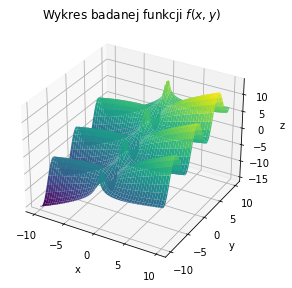

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Wykres badanej funkcji $f(x,y)$")
plt.tight_layout()
plt.show()

In [5]:
X = np.column_stack((x.flatten(), y.flatten()))
y = z.flatten()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=85)

In [7]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

In [8]:
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:,None])[:,0]
y_test = y_scaler.transform(y_test[:,None])[:,0]

In [9]:
from scipy.optimize import differential_evolution
from sklearn.model_selection import cross_validate
from joblib import dump

best_models = pd.DataFrame(columns=["kernel", "C", "epsilon", "coef0", "degree", "gamma", "mse", "mae", "r2"])

## linear

In [ ]:
def linear_mae_estimator(params):
    print('lin')
    if params[0] == 0 or params[1] == 0:
        return 100
    print('svm')
    model = svm.SVR(kernel='linear',C=params[0], epsilon=params[1])
    scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_absolute_error"])
    return (-1)*np.mean(scores["test_neg_mean_absolute_error"])
    
print('bounds')
bounds = [(0, 100), (0, 100)]
result = differential_evolution(linear_mae_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='linear', C=result.x[0], epsilon=result.x[1])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "linear", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'linear_mae.joblib') 

bounds


In [13]:
def linear_mse_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='linear',C=params[0], epsilon=params[1])
    scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_squared_error"])
    return (-1)*np.mean(scores["test_neg_mean_squared_error"])
    
bounds = [(0, 100), (0, 100)]
result = differential_evolution(linear_mse_estimator, bounds, disp=True, maxiter=15,polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='linear',C=result.x[0], epsilon=result.x[1])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "linear", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'linear_mse.joblib') 

differential_evolution step 1: f(x)= 0.0805402
differential_evolution step 2: f(x)= 0.0805402
differential_evolution step 3: f(x)= 0.0135855
differential_evolution step 4: f(x)= 0.00348945
differential_evolution step 5: f(x)= 0.00348945
differential_evolution step 6: f(x)= 0.00348945
differential_evolution step 7: f(x)= 0.00348945
differential_evolution step 8: f(x)= 0.00348945
differential_evolution step 9: f(x)= 0.00348945
differential_evolution step 10: f(x)= 0.00234099
differential_evolution step 11: f(x)= 0.000279594
differential_evolution step 12: f(x)= 0.000279594
differential_evolution step 13: f(x)= 0.000279594
differential_evolution step 14: f(x)= 0.000169454
differential_evolution step 15: f(x)= 2.90459e-05
[2.16228262e+01 1.34371315e-02] 2.9045903341618407e-05
MAE: 0.004360115680327556
MSE: 2.8562455079315118e-05
R2: 0.9999691790990218


['linear_mse.joblib']

In [14]:
def linear_r2_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='linear',C=params[0], epsilon=params[1])
    scores = cross_validate(model, X_train, y_train, scoring=["r2"])
    return (-1)*np.mean(scores["test_r2"])
    
bounds = [(0, 100), (0, 100)]
result = differential_evolution(linear_r2_estimator, bounds, disp=True, maxiter=15,polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='linear',C=result.x[0], epsilon=result.x[1])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "linear", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'linear_r2.joblib') 

differential_evolution step 1: f(x)= -0.573264
differential_evolution step 2: f(x)= -0.573264
differential_evolution step 3: f(x)= -0.972093
differential_evolution step 4: f(x)= -0.972093
differential_evolution step 5: f(x)= -0.99799
differential_evolution step 6: f(x)= -0.99799
differential_evolution step 7: f(x)= -0.99799
differential_evolution step 8: f(x)= -0.99799
differential_evolution step 9: f(x)= -0.999999
differential_evolution step 10: f(x)= -0.999999
differential_evolution step 11: f(x)= -0.999999
differential_evolution step 12: f(x)= -0.999999
differential_evolution step 13: f(x)= -0.999999
differential_evolution step 14: f(x)= -0.999999
differential_evolution step 15: f(x)= -0.999999
[6.09208014e+00 2.85905178e-03] -0.9999986351663672
MAE: 0.0009130199169822569
MSE: 1.2462861637601904e-06
R2: 0.9999986551694405


['linear_r2.joblib']

## rbf

In [15]:
def rbf_mae_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='rbf',C=params[0], epsilon=params[1], gamma=params[2])
    scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_absolute_error"])
    return (-1)*np.mean(scores["test_neg_mean_absolute_error"])
    
bounds = [(0, 10), (0, 100), (0,100)]
result = differential_evolution(rbf_mae_estimator, bounds, disp=True, maxiter=15,polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='rbf',C=result.x[0], epsilon=result.x[1], gamma=result.x[2])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "rbf", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "gamma": result.x[2],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'rbf_mae.joblib') 

differential_evolution step 1: f(x)= 0.0322259
differential_evolution step 2: f(x)= 0.0322259
differential_evolution step 3: f(x)= 0.0322259
differential_evolution step 4: f(x)= 0.0322259
differential_evolution step 5: f(x)= 0.0322259
differential_evolution step 6: f(x)= 0.0322259
differential_evolution step 7: f(x)= 0.0322259
differential_evolution step 8: f(x)= 0.0322259
differential_evolution step 9: f(x)= 0.0322259
differential_evolution step 10: f(x)= 0.0322259
differential_evolution step 11: f(x)= 0.0180361
differential_evolution step 12: f(x)= 0.0180361
differential_evolution step 13: f(x)= 0.0180361
differential_evolution step 14: f(x)= 0.0180361
differential_evolution step 15: f(x)= 0.0180268
[7.89738868e+00 2.07081575e-02 3.01051659e+01] 0.01802678187973957
MAE: 0.01802391729399848
MSE: 0.00035133144168140963
R2: 0.9996208886265379


['rbf_mae.joblib']

In [ ]:
def rbf_mse_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='rbf',C=params[0], epsilon=params[1], gamma=params[2])
    scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_squared_error"])
    return (-1)*np.mean(scores["test_neg_mean_squared_error"])
    
bounds = [(0, 10), (0, 100), (0,100)]
result = differential_evolution(rbf_mse_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='rbf',C=result.x[0], epsilon=result.x[1], gamma=result.x[2])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "rbf", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "gamma": result.x[2],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'rbf_mse.joblib') 

In [ ]:
def rbf_r2_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='rbf',C=params[0], epsilon=params[1], gamma=params[2])
    scores = cross_validate(model, X_train, y_train, scoring=["r2"])
    return (-1)*np.mean(scores["test_r2"])
    
bounds = [(50, 100), (0, 10), (0,100)]
result = differential_evolution(rbf_r2_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='rbf',C=result.x[0], epsilon=result.x[1], gamma=result.x[2])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "rbf", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "gamma": result.x[2],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'rbf_r2.joblib') 

In [10]:
import math

## poly

In [ ]:
def poly_mae_estimator(params):
    print(params)
    if params[0] == 0 or params[1] == 0 or params[2] == 0 or params[3]== 0:
        return 100
    model = svm.SVR(kernel='poly',C=params[0], epsilon=params[1], coef0=params[2], degree=math.floor(params[3]), verbose=3, tol=1e-1)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    print(model)
    return (-1)*metrics.mean_absolute_error(y_train, y_pred_train)
#     scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_absolute_error"], verbose=1)
#     print(scores)
#     return (-1)*np.mean(scores["test_neg_mean_absolute_error"])
    
print('henlo', poly_mae_estimator([1,3,4,4]))
bounds = [(0, 100), (0, 10), (0,10), (3,7.9)]
print('let\'s start')
result = differential_evolution(poly_mae_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='poly',C=result.x[0], epsilon=result.x[1], coef0=result.x[2], degree=ceil[result.x[3]])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "poly", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "coef0": result.x[2],
    "degree": result.x[3],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'poly_mae.joblib') 

[1, 3, 4, 4]
[LibSVM]SVR(C=1, coef0=4, degree=4, epsilon=3, kernel='poly', tol=0.1, verbose=3)
henlo -0.8112431543057994
let's start


In [ ]:
def poly_mse_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='poly',C=params[0], epsilon=params[1], coef0=params[2], degree=math.floor(params[3]), verbose=2, tol=1e-1, max_iter=1e4)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    return (-1)*metrics.mean_squared_error(y_train, y_pred_train)
    
bounds = [(0, 100), (0, 10), (0,10), (3,7.9)]
result = differential_evolution(poly_mse_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='poly',C=result.x[0], epsilon=result.x[1], coef0=result.x[2], degree=ceil[result.x[3]])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "poly", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "coef0": result.x[2],
    "degree": result.x[3],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'poly_mse.joblib') 

In [ ]:
def poly_r2_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='poly',C=params[0], epsilon=params[1], coef0=params[2], degree=math.floor(params[3]),verbose=3, tol=1e-1, max_iter=1e4)
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    return (-1)*metrics.r2_score(y_train, y_pred_train)
    
bounds = [(0, 100), (0, 10), (0,10), (3,7.9)]
result = differential_evolution(poly_r2_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='poly',C=result.x[0], epsilon=result.x[1], coef0=result.x[2], degree=ceil[result.x[3]])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "poly", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "coef0": result.x[2],
    "degree": result.x[3],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'poly_r2.joblib') 

## sigmoid

In [ ]:
def sigmoid_mae_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='sigmoid',C=params[0], epsilon=params[1], coef0=params[2])
    scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_absolute_error"])
    return (-1)*np.mean(scores["test_neg_mean_absolute_error"])
    
bounds = [(10, 100), (0, 10), (0,10)]
result = differential_evolution(sigmoid_mae_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='sigmoid',C=result.x[0], epsilon=result.x[1], coef0=result.x[2])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "sigmoid", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "coef0": result.x[2],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'sigmoid_mae.joblib') 

In [ ]:
def sigmoid_mse_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='sigmoid',C=params[0], epsilon=params[1], coef0=params[2])
    scores = cross_validate(model, X_train, y_train, scoring=["neg_mean_squared_error"])
    return (-1)*np.mean(scores["test_neg_mean_squared_error"])
    
bounds = [(10, 100), (0, 10), (0,10)]
result = differential_evolution(sigmoid_mae_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='sigmoid',C=result.x[0], epsilon=result.x[1], coef0=result.x[2])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "sigmoid", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "coef0": result.x[2],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'sigmoid_mse.joblib') 

In [ ]:
def sigmoid_r2_estimator(params):
    if params[0] == 0 or params[1] == 0 or params[0] == 0:
        return 100
    model = svm.SVR(kernel='sigmoid',C=params[0], epsilon=params[1], coef0=params[2])
    scores = cross_validate(model, X_train, y_train, scoring=["r2"])
    return (-1)*np.mean(scores["test_r2"])
    
bounds = [(10, 100), (0, 10), (0,10)]
result = differential_evolution(sigmoid_r2_estimator, bounds, disp=True, maxiter=15, polish=False, updating='deferred', workers=-1)
print(result.x, result.fun)

model = svm.SVR(kernel='sigmoid',C=result.x[0], epsilon=result.x[1], coef0=result.x[2])
model.fit(X_train, y_train)

print("MAE:", metrics.mean_absolute_error(y_test, model.predict(X_test)))
print("MSE:", metrics.mean_squared_error(y_test, model.predict(X_test)))
print("R2:",  metrics.r2_score(y_test, model.predict(X_test)))

best_models = best_models.append({
    "kernel": "sigmoid", 
    "C": result.x[0], 
    "epsilon": result.x[1], 
    "coef0": result.x[2],
    "mse": metrics.mean_squared_error(y_test, model.predict(X_test)),
    "mae": metrics.mean_absolute_error(y_test, model.predict(X_test)),
    "r2": metrics.r2_score(y_test, model.predict(X_test))
}, ignore_index=True)
dump(model, 'sigmoid_r2.joblib') 

In [ ]:
best_models.to_csv("./best-models.csv")